In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np




Still to do
1. hand create the histograms that we did in mass for better vizibility
2. Expand eda to include data to cover the questions
3. find populaiton data for calculation with city values(found a dataset with data from 2010's, not much else on the census site in csv form) 
4. try hyperparamater tuning the log regression model
5. look for features to engineer, make note of evaluation metrics before and anfter to see how this effects the model preformance
6. If new features are created add them to the EDA for vizualization creation
7. consider adding another model type to the pipeline in order to pit the comparisions agains each other. 
8. troubleshoot confusion matrix heat map issue





In [3]:
#import data from csv and read the first 5 rows to ensure the data loaded correctly
df = pd.read_csv("US_Crime_DataSet.csv")
df.head()

C:\Users\kings\AppData\Local\Temp\ipykernel_20820\2502527367.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("US_Crime_DataSet.csv")


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


1. Look into your data
2. Look at the proportion of missing data
3. Check the data type of each column
4. If you have columns of strings, check for trailing whitespaces
5. Dealing with Missing Values (NaN Values)
6. Extracting more information from your dataset to get more variables
7. Check the unique values of columnslumns

In [5]:
#find any missing vlues
null_counts = df.isnull().sum()
null_counts

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [6]:
#it appears there are no null values in the data set 

In [7]:
# drop the id field as its not useful
df= df.drop('Record ID', axis = 1) 

In [10]:
# get structure of the df to understand what data type each field has
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Agency Code            638454 non-null  object
 1   Agency Name            638454 non-null  object
 2   Agency Type            638454 non-null  object
 3   City                   638454 non-null  object
 4   State                  638454 non-null  object
 5   Year                   638454 non-null  int64 
 6   Month                  638454 non-null  object
 7   Incident               638454 non-null  int64 
 8   Crime Type             638454 non-null  object
 9   Crime Solved           638454 non-null  object
 10  Victim Sex             638454 non-null  object
 11  Victim Age             638454 non-null  int64 
 12  Victim Race            638454 non-null  object
 13  Victim Ethnicity       638454 non-null  object
 14  Perpetrator Sex        638454 non-null  object
 15  

<function matplotlib.pyplot.show(close=None, block=None)>

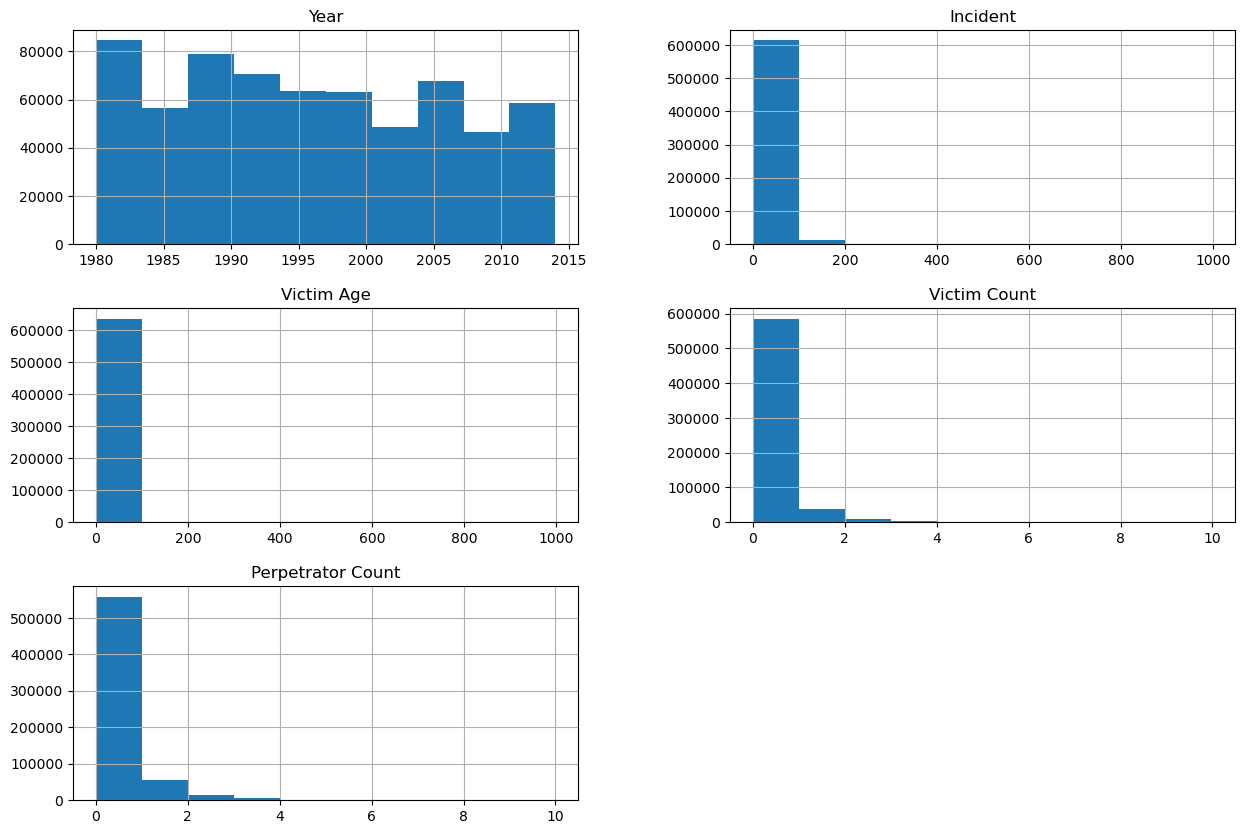

In [12]:
# lest pull histograms for the int objects
df.hist(figsize=(15, 10))
plt.show
#basic evaludation of results

#Year - There appears to be a trend downward 
#Incident - need to dig further into why we have some values over 100 and possibly rerun this chard with smaller x bins
#victem age






<Axes: xlabel='State'>

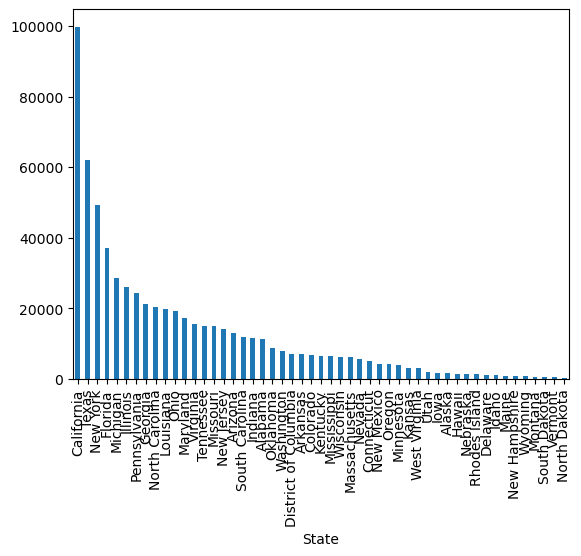

In [13]:
df['State'].value_counts().plot(kind='bar')
#larger populated states appear to have more murders recorded 

<Axes: xlabel='Agency Type'>

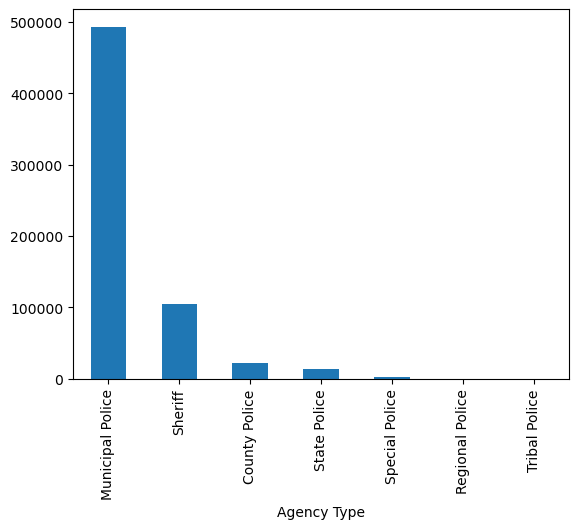

In [14]:
df['Agency Type'].value_counts().plot(kind='bar')
#typically the municipal police are the ones to responde to these murders

<Axes: xlabel='Crime Type'>

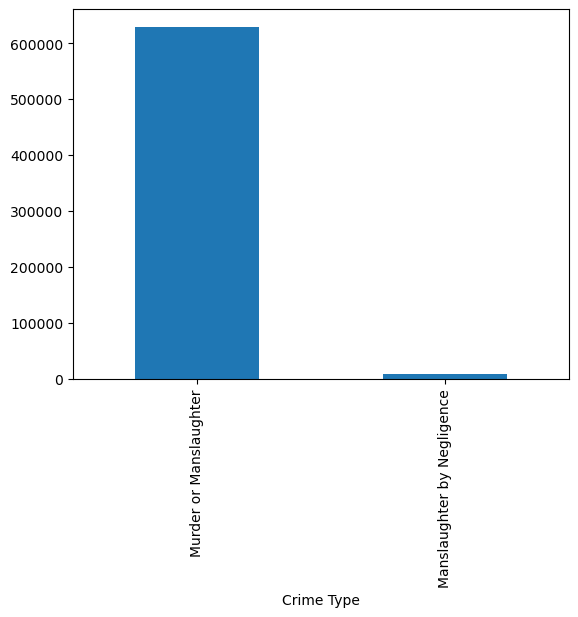

In [15]:
df['Crime Type'].value_counts().plot(kind='bar')
#the vast majority are murders, but there are a few manslaughter by neglegence

<Axes: xlabel='Crime Solved'>

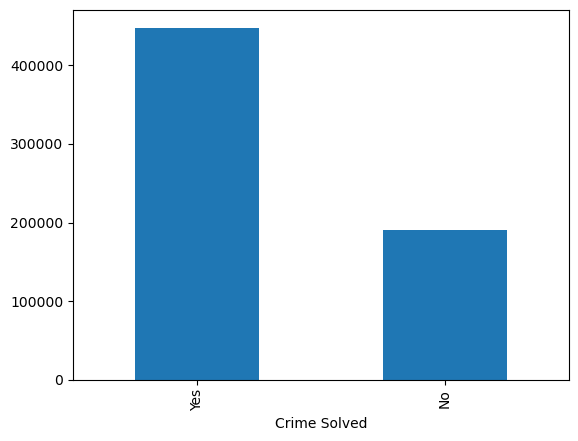

In [16]:
df['Crime Solved'].value_counts().plot(kind='bar')
# over twice as many incidents in the dataset are solved

<Axes: xlabel='Victim Sex'>

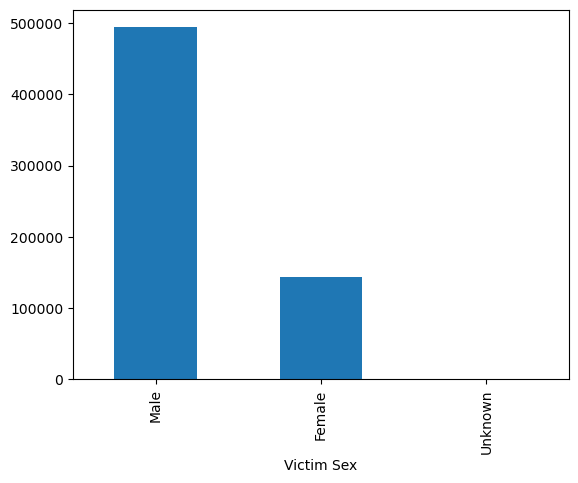

In [17]:
df['Victim Sex'].value_counts().plot(kind='bar')
# a larger amount of the victems were male

<Axes: xlabel='Victim Age'>

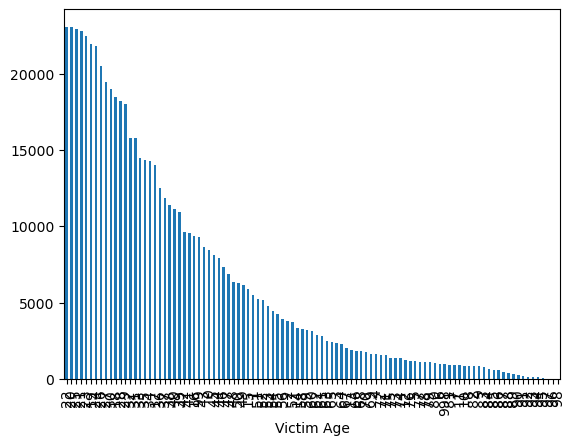

In [18]:
df['Victim Age'].value_counts().plot(kind='bar')
#A larger amound of the victems are of a younger age
# concider changing this to bins in the future for better readability

<Axes: xlabel='Victim Race'>

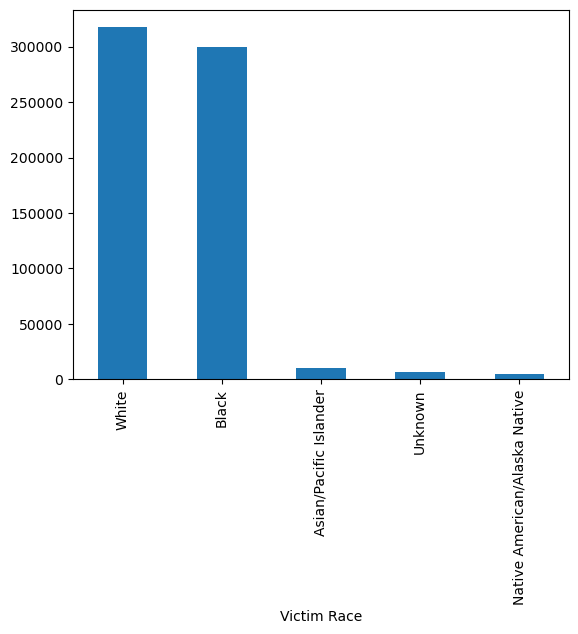

In [19]:
df['Victim Race'].value_counts().plot(kind='bar')
#white and black are the most common victems

<Axes: xlabel='Victim Ethnicity'>

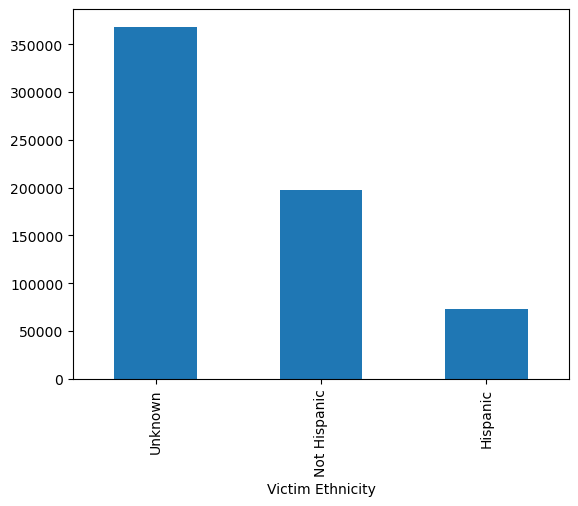

In [20]:
df['Victim Ethnicity'].value_counts().plot(kind='bar')
#The ethnicity of the victems is not recorded in most cases

<Axes: xlabel='Weapon'>

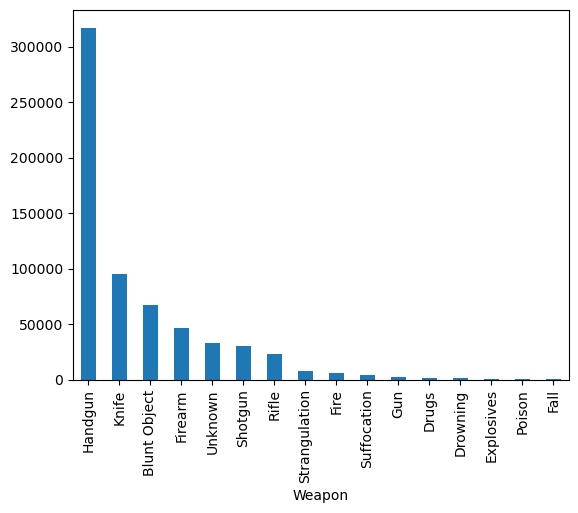

In [21]:
df['Weapon'].value_counts().plot(kind='bar')
#handgun is the majority of these entries.  

<Axes: xlabel='Victim Count'>

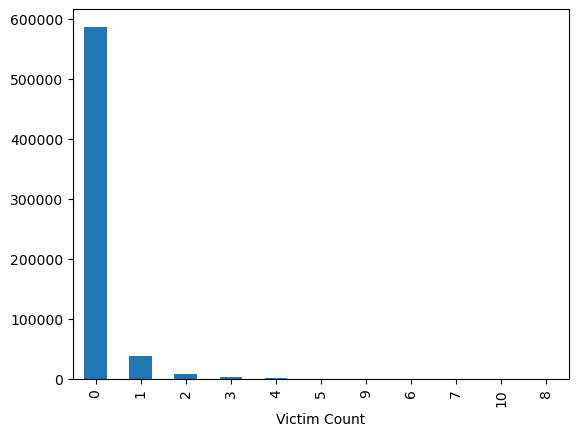

In [23]:
df['Victim Count'].value_counts().plot(kind='bar')
# I'm concerned about how this dataset has so many 0 victem counts

<Axes: xlabel='Record Source'>

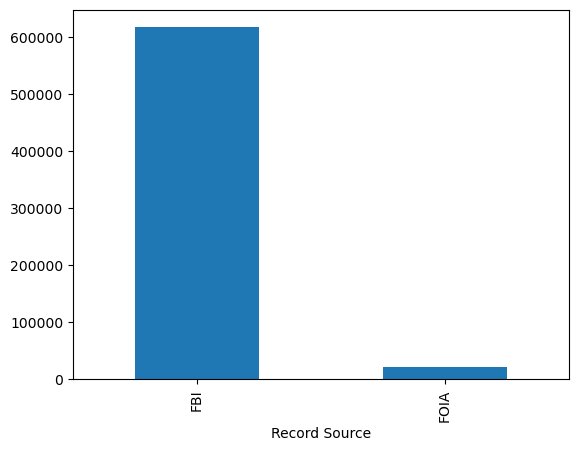

In [26]:
df['Record Source'].value_counts().plot(kind='bar')

In [28]:
#df.head()
#even though our model is not using the perpetrator data we should probalby go cakc and vizualize those columns as well

In [31]:
#drop data irrelevant to this model, including any perpetrator data as that would directly tie into the prediction of if the murder was solved

df.drop(['Agency Code','City','Crime Type','Incident','Agency Name','Perpetrator Sex','Perpetrator Age','Perpetrator Race','Perpetrator Ethnicity','Perpetrator Count','Record Source','Relationship'], axis=1, inplace=True) 




In [32]:
df.head()

,Agency Type,State,Year,Month,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Weapon,Victim Count
0,Municipal Police,Alaska,1980,January,Yes,Male,14,Native American/Alaska Native,Unknown,Blunt Object,0
1,Municipal Police,Alaska,1980,March,Yes,Male,43,White,Unknown,Strangulation,0
2,Municipal Police,Alaska,1980,March,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0
3,Municipal Police,Alaska,1980,April,Yes,Male,43,White,Unknown,Strangulation,0
4,Municipal Police,Alaska,1980,April,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0


In [33]:
# Reduce memory usage, in an early itteration memory was a big problem and this helped to some degree
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':  # for integers
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:  # for floats.
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [37]:
df.shape

(638454, 11)

In [42]:
#split out our target from the remainder of the dataset
y = df['Crime Solved']
x = df.drop('Crime Solved',axis=1)

In [46]:
#create dummy varables for each of the non numeric values  
col_cat = x.select_dtypes('object')
df_dummies = pd.get_dummies(x[col_cat.columns])
x = x.drop(x[col_cat.columns],axis = 1)
x = x.join(df_dummies)

In [48]:
#check the shape of the new df
x.shape


(638454, 100)

In [49]:
x.head()

,Year,Victim Age,Victim Count,Agency Type_County Police,Agency Type_Municipal Police,Agency Type_Regional Police,Agency Type_Sheriff,Agency Type_Special Police,Agency Type_State Police,Agency Type_Tribal Police,...,Weapon_Firearm,Weapon_Gun,Weapon_Handgun,Weapon_Knife,Weapon_Poison,Weapon_Rifle,Weapon_Shotgun,Weapon_Strangulation,Weapon_Suffocation,Weapon_Unknown
0,1980,14,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1980,43,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1980,30,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1980,43,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1980,30,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [51]:
#store the headers for latter use
x_cols = x.columns

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

n = x.shape[0]  # number of rows
batch_size = 1000  # number of rows in each call to partial_fit
index = 0  # helper-var

while index < n:
    partial_size = min(batch_size, n - index)  # needed because last loop is possibly incomplete
    partial_x = x[index:index+partial_size]
    scaler.partial_fit(partial_x)
    index += partial_size

In [56]:
#scale the data to the model fitted in the last step
scaled_values =  scaler.transform(x)

In [69]:
#I like to verify the shape changed to ensure the previous step was preformed correclty
print(scaled_values.shape)

(638454, 100)


In [73]:
#convert back to a dataframe and restore the headers
scaled_df = pd.DataFrame(scaled_values, columns = x_cols)

In [74]:
scaled_df.head()

,Year,Victim Age,Victim Count,Agency Type_County Police,Agency Type_Municipal Police,Agency Type_Regional Police,Agency Type_Sheriff,Agency Type_Special Police,Agency Type_State Police,Agency Type_Tribal Police,...,Weapon_Firearm,Weapon_Gun,Weapon_Handgun,Weapon_Knife,Weapon_Poison,Weapon_Rifle,Weapon_Shotgun,Weapon_Strangulation,Weapon_Suffocation,Weapon_Unknown
0,-1.59162,-0.505270,-0.229359,-0.191973,0.543112,-0.019189,-0.44447,-0.067421,-0.151012,-0.009197,...,-0.281831,-0.058883,-0.994555,-0.418002,-0.026676,-0.194823,-0.224837,-0.113428,-0.079081,-0.234177
1,-1.59162,0.191372,-0.229359,-0.191973,0.543112,-0.019189,-0.44447,-0.067421,-0.151012,-0.009197,...,-0.281831,-0.058883,-0.994555,-0.418002,-0.026676,-0.194823,-0.224837,8.816138,-0.079081,-0.234177
2,-1.59162,-0.120916,-0.229359,-0.191973,0.543112,-0.019189,-0.44447,-0.067421,-0.151012,-0.009197,...,-0.281831,-0.058883,-0.994555,-0.418002,-0.026676,-0.194823,-0.224837,-0.113428,-0.079081,4.270267
3,-1.59162,0.191372,-0.229359,-0.191973,0.543112,-0.019189,-0.44447,-0.067421,-0.151012,-0.009197,...,-0.281831,-0.058883,-0.994555,-0.418002,-0.026676,-0.194823,-0.224837,8.816138,-0.079081,-0.234177
4,-1.59162,-0.120916,-0.229359,-0.191973,0.543112,-0.019189,-0.44447,-0.067421,-0.151012,-0.009197,...,-0.281831,-0.058883,-0.994555,-0.418002,-0.026676,-0.194823,-0.224837,-0.113428,-0.079081,4.270267


In [77]:
nums = range(10, 100, 5)

In [78]:
print(nums)

range(10, 100, 5)


In [79]:
#pip install tqdm

In [87]:
#preform pca on the dataset looping to find where the variance ratio drops, this yielded a graph that shows there is not a sharp enough drop off to feel necessary 
from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm

var_ratio = []
for num in tqdm(nums):
    ipca = IncrementalPCA(n_components=num,batch_size = 1000)
    ipca.fit(scaled_df)
    var_ratio.append(np.sum(ipca.explained_variance_ratio_))
    



100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:45<00:00,  2.51s/it]


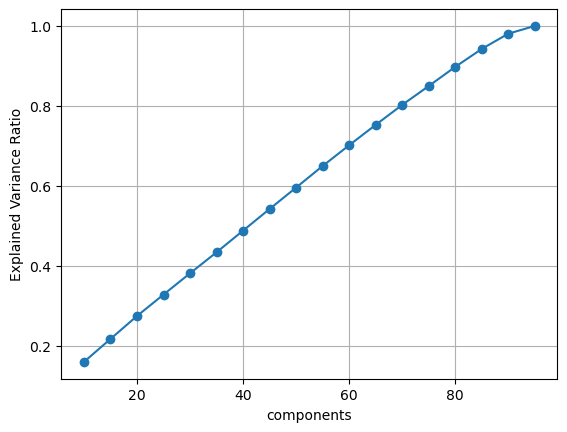

In [88]:
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [89]:
#later depricated and not used in the final results
#preform pca for n of 80 to preserve 90 variance
#df_pca = IncrementalPCA(n_components=80,batch_size = 1000)
#df_pca = df_pca.fit_transform(scaled_df)


In [115]:
#df_pca.shape

In [119]:
#resample data to fix over sampling problem
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
x, y = rus.fit_resample(scaled_df, y)

In [122]:
#train test split
from sklearn.model_selection import train_test_split


In [124]:
#ended up disgarding the pca data
#x_train, x_test, y_train, y_test= train_test_split(scaled_df,y, test_size=0.2,random_state=42)
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,random_state=42)

In [126]:
#verify the shapes of the variables
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(304451, 100) (76113, 100) (304451,) (76113,)


In [136]:
# make a pipeline that will take care of the scaling and regression of the data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pipe_logr = make_pipeline(LogisticRegression(max_iter=1000))
pipe_logr.fit(x_train, y_train) # apply scaling on training data
#grad the accuracy score
pipe_logr.score(x_test, y_test) # apply scaling on testing data

0.6459080577562308

In [137]:
# create predictions based on the model
logr_y_pred = pipe_logr.predict(x_test)

In [142]:
from sklearn.metrics import roc_curve, roc_auc_score

In [144]:
#create a data set of random guesses for comparison in the ROC curve
r_probs = [0 for _ in range(len(y_test))]
#create the probabilities from our model
logr_probs =  pipe_logr.predict_proba(x_test)

In [146]:
logr_probs = logr_probs[:, 1] #keep only posotive outcomes

In [148]:
#Calculate the AUC values
r_auc = roc_auc_score(y_test, r_probs)
logr_auc = roc_auc_score(y_test, logr_probs)

In [149]:
#Change the yes no fields to 0's and 1's
y_test_2 = y_test.map({'Yes': 1, 'No': 0}).astype(int)

In [152]:
#gather true positive and false positive rates
r_fpr, r_tpr, _ = roc_curve(y_test_2, r_probs)
logr_fpr, logr_tpr, _ = roc_curve(y_test_2, logr_probs,pos_label=1)

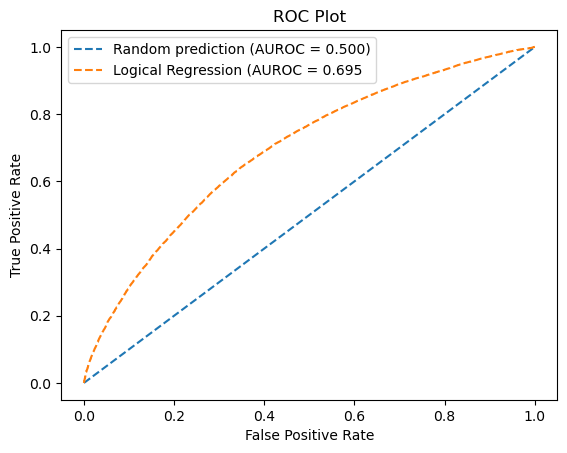

In [154]:
#plot roc vs random predections
#this viz does not reflect well for our model, Usually you want to see a sharper incline at left and for the roc curve to be close to the top
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(logr_fpr, logr_tpr, linestyle='--', label='Logical Regression (AUROC = %0.3f' % logr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [158]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [161]:
#print(y_test)

In [163]:
#print(y_pred.shape)

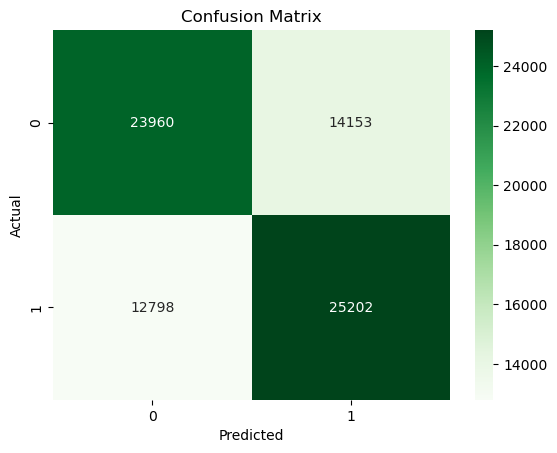

In [165]:
#create and plot the confusion matrix

cm = confusion_matrix(y_test, logr_y_pred,labels=['Yes','No'])

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [169]:
#create the classification report
from sklearn.metrics import classification_report, precision_score


print(classification_report(y_test,logr_y_pred))

              precision    recall  f1-score   support

          No       0.64      0.66      0.65     38000
         Yes       0.65      0.63      0.64     38113

    accuracy                           0.65     76113
   macro avg       0.65      0.65      0.65     76113
weighted avg       0.65      0.65      0.65     76113



In [171]:
#create the classifiers for each model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
clf1 = LogisticRegression(solver=['newton-cg','lbfgs'])
clf2 = RandomForestClassifier(random_state=42)
clf3 = KNeighborsClassifier()

In [172]:
#have to create the pipeline with a classifier but in the params we speciy the classifier which overrides this 
pipe = Pipeline([('classifier',clf1)])

In [176]:
#create the parameter dictionary for clf1
params1 = {}
params1['classifier__C'] = [np.logspace(-3, 3, 7)]
params1['classifier__max_iter'] = [1000]
params1['classifier'] = [clf1]

In [178]:
#create the paramater dictionary for clf2
params2 = {}
params2['classifier__n_estimators']= [100, 200]
params2['classifier__max_depth']= [10, None]
params2['classifier__min_samples_split'] = [2, 5]
params2['classifier__max_features'] = ['sqrt']
params2['classifier'] = [clf2]

In [180]:
#create the paramater dictionary for clf3
params3 = {}
params3['classifier__n_neighbors'] = [3,5,7,9,11,13,15]
params3['classifier__weights'] = ['uniform','distance']
params3['classifier__metric'] = ['minkowski','euclidean','manhattan']
params3['classifier'] = [clf3]

In [182]:
#create list of parameters
params = [params1,params2,params3]

In [ ]:
#run the gridsearch against our models and parameters, this took a long time so I had the verbose set to 10 for monitoring, I am going to convert this to markdown for the sake of space during the pdf rendering of the code
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params,verbose=10)
best_grid = grid.fit(x_train,y_train)

In [220]:
#show the best model based on the grid search
best_grid =  grid.best_estimator_
grid.best_params_

{'classifier': RandomForestClassifier(random_state=42),
 'classifier__max_depth': None,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 200}

best params
{'classifier': RandomForestClassifier(random_state=42),
 'classifier__max_depth': 20,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 200}

In [192]:
import pickle

In [194]:
#pickle the model just in case for some reason I need to reboot the kernal so I dont have to re-run the grid search as it was time consuming, if this does not work I will build the params based on the best params above
#pickle.dump(grid,open('finalized_model.sav','wb'))

In [102]:
#loaded_grid = pickle.load(open('finalized_model.sav','rb'))

In [222]:
print(grid)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(solver=['newton-cg',
                                                                   'lbfgs']))]),
             param_grid=[{'classifier': [LogisticRegression(solver=['newton-cg',
                                                                    'lbfgs'])],
                          'classifier__C': [array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])],
                          'classifier__max_iter': [1000]},
                         {'classifier': [RandomForestClassifier(random_state=42)],
                          'classifier__max_depth': [10, None],
                          'classifier__max_features': ['sqrt'],
                          'classifier__min_samples_split': [2, 5],
                          'classifier__n_estimators': [100, 200]},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__metric

In [224]:
#create a prediction based on the new model
from sklearn import metrics

y_pred = best_grid.predict(x_test)

In [225]:
print(metrics.accuracy_score(y_test,y_pred))

0.6591515247066861


In [228]:
#create a data set of random guesses for comparison in the ROC curve
r_probs = [0 for _ in range(len(y_test))]
#create the probabilities from our model
best_probs =  best_grid.predict_proba(x_test)

In [229]:
best_probs = best_probs[:, 1] #keep only posotive outcomes

In [230]:
#Calculate the AUC values
r_auc = roc_auc_score(y_test, r_probs)
best_auc = roc_auc_score(y_test, best_probs)

In [231]:
#Change the yes no fields to 0's and 1's
y_test_2 = y_test.map({'Yes': 1, 'No': 0}).astype(int)

In [236]:
#gather true positive and false positive rates
r_fpr, r_tpr, _ = roc_curve(y_test_2, r_probs)
best_fpr, best_tpr, _ = roc_curve(y_test_2, best_probs,pos_label=1)

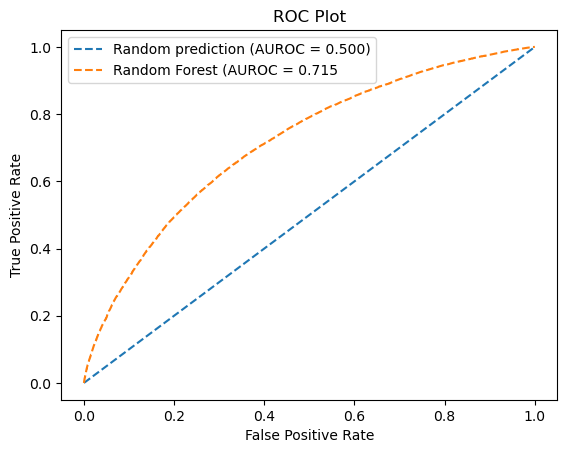

In [238]:
#looks similar to the original model but the auroc is quite a bit higher
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(best_fpr, best_tpr, linestyle='--', label='Random Forest (AUROC = %0.3f' % best_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

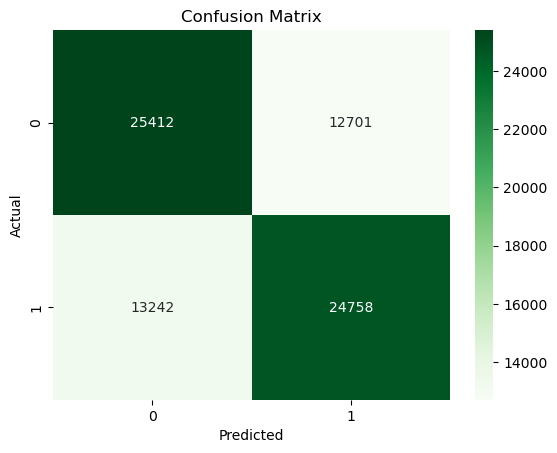

In [240]:
#create and plot the confusion matrix

cm = confusion_matrix(y_test, y_pred,labels=['Yes','No'])

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [242]:
#the precision shows 66 percent accurate 
#the recall shows we caught more positives than negatives, this lends to our false negatives being high in our confusion matrix
        # I revised the oversampling problem in my initial model and after this was resolved the false positives and negatives appear to be close
#the f1 shows the model showing the same accuracy 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.66      0.65      0.66     38000
         Yes       0.66      0.67      0.66     38113

    accuracy                           0.66     76113
   macro avg       0.66      0.66      0.66     76113
weighted avg       0.66      0.66      0.66     76113

